In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
! git clone https://github.com/h2oai/pystacknet
! cd pystacknet
! python setup.py install


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,LabelEncoder,scale
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from numpy import hstack
from numpy import vstack
from numpy import asarray


from catboost import CatBoostClassifier

import catboost
import datetime
print(tf.__version__)









In [ ]:
train=pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')
test=pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/test.csv')

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.head()

## Checking Categorical Columns

### Drawing a Barplot and analysing the value counts for each unique category. If alot of unique values then will merge some columns according to a decided a threshold of counts

In [ ]:
def categorical_bar_plot(column_name,mode):
    if mode=="train":
        df=pd.DataFrame(train[column_name].value_counts()).reset_index()
        print(df)
    else:
        df=pd.DataFrame(test[column_name].value_counts()).reset_index()
        print(df)

    ax = sns.barplot(x="index",y=column_name, data=df)
    ax.set_title(mode+" "+column_name+" "+"count")

In [ ]:
categorical_bar_plot("cat0",mode="train")

In [ ]:
categorical_bar_plot("cat0",mode="test")

In [ ]:
categorical_bar_plot("cat1",mode="train")

In [ ]:
categorical_bar_plot("cat1",mode="test")

In [ ]:
categorical_bar_plot("cat2",mode="train")

In [ ]:
categorical_bar_plot("cat2",mode="test")

In [ ]:
categorical_bar_plot("cat3",mode="train")

In [ ]:
categorical_bar_plot("cat3",mode="test")

In [ ]:
categorical_bar_plot("cat4",mode="train")

In [ ]:
categorical_bar_plot("cat3",mode="test")

In [ ]:
categorical_bar_plot("cat3",mode="train")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat3",mode="test")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat6",mode="train")

In [ ]:
categorical_bar_plot("cat6",mode="test")

In [ ]:
categorical_bar_plot("cat7",mode="train")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat7",mode="test")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat8",mode="train")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat8",mode="test")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat9",mode="train")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat9",mode="test")
fig=plt.gcf()
fig.set_size_inches((30,10))

In [ ]:
categorical_bar_plot("cat10",mode="train")
fig=plt.gcf()
fig.set_size_inches((80,10))

In [ ]:
categorical_bar_plot("cat10",mode="test")
fig=plt.gcf()
fig.set_size_inches((80,10))

In [ ]:
categorical_bar_plot("cat11",mode="train")

In [ ]:
categorical_bar_plot("cat11",mode="test")

In [ ]:
categorical_bar_plot("cat12",mode="train")

In [ ]:
categorical_bar_plot("cat12",mode="test")

In [ ]:
categorical_bar_plot("cat13",mode="train")

In [ ]:
categorical_bar_plot("cat13",mode="test")

In [ ]:
categorical_bar_plot("cat14",mode="train")

In [ ]:
categorical_bar_plot("cat14",mode="test")

In [ ]:
categorical_bar_plot("cat15",mode="train")

In [ ]:
categorical_bar_plot("cat15",mode="test")

In [ ]:
categorical_bar_plot("cat16",mode="train")

In [ ]:
categorical_bar_plot("cat16",mode="test")

In [ ]:
categorical_bar_plot("cat17",mode="train")

In [ ]:
categorical_bar_plot("cat17",mode="test")

In [ ]:
categorical_bar_plot("cat18",mode="train")

In [ ]:
categorical_bar_plot("cat18",mode="test")

### Following columns are identified which have alot of unique categories therefore following columns categories will be merged according to some threshold. 
1.  cat1
2.  cat2
3.  cat3
4.  cat4
5.  cat5
6.  cat6
7.  cat7
8.  cat8
9.  cat9
10. cat10
### For example Before and After Value Counts are shown for Cat9:
#### Before
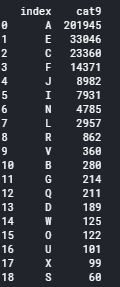

 #### After
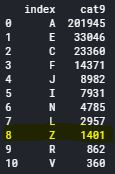


In [ ]:

### Checking whether there is any difference in unique values of category between train and test set
for i in range(0,19):
    a=set(pd.DataFrame(train["cat{}".format(str(i))].value_counts()).reset_index()['index'].tolist())
    b=set(pd.DataFrame(test["cat{}".format(str(i))].value_counts()).reset_index()['index'].tolist())
    print((b^a,i))

In [ ]:
### Cat_10 is a red_flag
temp=pd.DataFrame(train["cat10"].value_counts()).reset_index()
print("Counts of categories present in train but not in test")
print(temp[(temp["index"].isin(['MW', 'LK', 'IL', 'JF', 'BS', 'MO', 'CH', 'FW', 'CX', 'GH', 'AW', 'MK']))]["cat10"])
temp=pd.DataFrame(test["cat10"].value_counts()).reset_index()
print("Counts of categories present in test but not in train")
print(temp[(temp["index"].isin(['BU', 'BW', 'CA', 'DG', 'EJ', 'JM', 'KE', 'KM']))]["cat10"])
### The count of the red flag values is really low therefore can be safetly replaced

In [ ]:
THRESHOLD_COUNT=600 ### A category count must be above 30 in order to be counted as a separate category
NEW_CAT="Z"
column_categories_merged=["cat1","cat2","cat3","cat4","cat5","cat6","cat7","cat8","cat9","cat10"]


def merge_categories(cat_name):
    df=pd.DataFrame(train[cat_name].value_counts()).reset_index()
    cat_to_be_merged=df[(df[cat_name]<THRESHOLD_COUNT)]["index"].tolist()
    if cat_name=="cat10":
        cat_to_be_merged.extend(['BU', 'BW', 'CA', 'DG', 'EJ', 'JM', 'KE', 'KM'])
    return (train[cat_name].replace(cat_to_be_merged,NEW_CAT),test[cat_name].replace(cat_to_be_merged,NEW_CAT))
for col in column_categories_merged:
    train_new,test_new=merge_categories(col)
    train[col]=train_new
    test[col]=test_new


In [ ]:
train.shape,test.shape

## Checking continuous Columns

### Just analysing the distribution of each continuous column

In [ ]:
def contnious_plot(column_name):
    f, axes = plt.subplots(1, 2,figsize=(10,5),sharey=True)
    sns.kdeplot(data=train, x=column_name,ax=axes[0])
    sns.kdeplot(data=test, x=column_name,ax=axes[1])  
    axes[0].set_title("Train")
    axes[1].set_title("Test")
    plt.tight_layout()

In [ ]:
for i in range(0,11):
    contnious_plot("cont{}".format(str(i)))

In [ ]:
#### Quick check of Target Variable
categorical_bar_plot("target",mode="train")

### Simple One-Hot-Encoding

In [ ]:
target=train["target"]
train=pd.get_dummies(train.drop("target",1))
train["target"]=target
test=pd.get_dummies(test)

In [ ]:
train.shape,test.shape ## After one hot encoding

# Super Learner
## I follwed the following implementation:
[Super Learner](https://machinelearningmastery.com/super-learner-ensemble-in-python/)

![Super Learner Overview](https://machinelearningmastery.com/wp-content/uploads/2019/10/Diagram-Showing-the-Data-Flow-of-the-Super-Learner-Algorithm.png)

In [ ]:
# create a list of base-models
def get_models():
    models = list()
    models.append(DecisionTreeClassifier())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier(n_estimators=10))
    models.append(RandomForestClassifier(n_estimators=10))
    models.append(ExtraTreesClassifier(n_estimators=10))
    models.append(LGBMClassifier())
    models.append(CatBoostClassifier())
    return models

In [ ]:
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
    # define split of data
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        print("Training the Models")
        for model in tqdm(models):
            model.fit(train_X, train_y)
            yhat = model.predict_proba(test_X)
            # store columns
            fold_yhats.append(yhat)
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), np.array(meta_y)

In [ ]:
# fit a meta model
def fit_meta_model(X, y):
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return model

In [ ]:
# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)
        
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        acc = accuracy_score(y, yhat)
        print('%s: %.3f' % (model.__class__.__name__, acc*100))
        
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in tqdm(models):
        yhat = model.predict_proba(X)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    # predict
    return meta_model.predict(meta_X)

In [ ]:
X=train.drop("target",1).values
y=train["target"].values
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50,stratify=y)

# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X, y, models)


In [ ]:
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_val, y_val, models)
# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

In [ ]:
final_prediction = super_learner_predictions(test.values, models, meta_model)

In [ ]:
submission = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv')
submission["target"]=final_prediction
submission.to_csv('submission.csv', index=False)